In [1]:
import pandas as pd

# Load the data from your CSV files
players = pd.read_csv("Player_Statistics.csv")
goals = pd.read_csv("Goals_Statistics.csv")
schedule = pd.read_csv("Schedule.csv")
team_stats = pd.read_csv("Team_Statistics.csv")


In [2]:
#A. How many games did the team play?
# From the schedule
num_games = len(schedule)
print("Total games played:", num_games)


Total games played: 19


In [3]:
#B. Who scored the most goals?
# Remove summary rows first (like 'Totals'/'Opponents')
players_subset = players[~players['Player'].str.contains('Totals|Opponents|TM Team', na=False)]
top_scorer = players_subset.loc[players_subset['G'].astype(int).idxmax()]
print("Top goal scorer:", top_scorer["Player"], "-", top_scorer["G"], "goals")


Top goal scorer: 5 Muchnick, Emma - 34 goals


In [4]:
#C. Who had the most assists?
top_assist = players_subset.loc[players_subset['A'].astype(int).idxmax()]
print("Most assists:", top_assist["Player"], "-", top_assist["A"], "assists")


Most assists: 44 Ward, Emma - 46 assists


In [5]:
#D. Who contributed the most points?
top_pts = players_subset.loc[players_subset['PTS'].astype(int).idxmax()]
print("Most points:", top_pts["Player"], "-", top_pts["PTS"], "points")


Most points: 44 Ward, Emma - 76 points


In [6]:
#E. What are the team totals for Goals, Assists, Points?
total_goals = players_subset['G'].astype(int).sum()
total_assists = players_subset['A'].astype(int).sum()
total_pts = players_subset['PTS'].astype(int).sum()
print("Team totals — Goals:", total_goals, "Assists:", total_assists, "Points:", total_pts)


Team totals — Goals: 234 Assists: 112 Points: 346


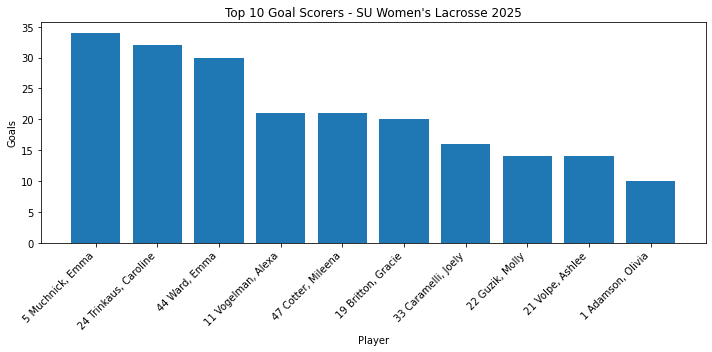

In [7]:
#F. Visualize Goals by Player
import matplotlib.pyplot as plt

# Top 10 goal scorers for readability
top10 = players_subset.sort_values("G", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10["Player"], top10["G"].astype(int))
plt.xlabel("Player")
plt.ylabel("Goals")
plt.title("Top 10 Goal Scorers - SU Women's Lacrosse 2025")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [9]:
#G Most Efficient Scorer (Goals per Shot, min N shots)

players_subset = players[~players['Player'].str.contains('Totals|Opponents|TM Team', na=False)]
players_subset = players_subset[players_subset['SH'].astype(int) > 10]  # e.g., minimum 10 shots
players_subset['G_per_SH'] = players_subset['G'].astype(int) / players_subset['SH'].astype(int)
eff_scorer = players_subset.sort_values('G_per_SH', ascending=False).head(1)
print("Most efficient scorer:", eff_scorer[['Player', 'G_per_SH']])


Most efficient scorer:             Player  G_per_SH
11  72 DeVito, Sam  0.666667


In [10]:
#H Largest Impact on Draws or Ground Balls (Per Game)
players_subset['GB_per_GP'] = players_subset['GB'].astype(int) / players_subset['GP'].astype(int)
players_subset['DC_per_GP'] = players_subset['DC'].astype(int) / players_subset['GP'].astype(int)

gb_leader = players_subset.sort_values('GB_per_GP', ascending=False).head(1)
dc_leader = players_subset.sort_values('DC_per_GP', ascending=False).head(1)

print("Highest GB per game:", gb_leader[['Player', 'GB_per_GP']])
print("Highest DC per game:", dc_leader[['Player', 'DC_per_GP']])


Highest GB per game:              Player  GB_per_GP
2  5 Muchnick, Emma   1.421053
Highest DC per game:                 Player  DC_per_GP
6  33 Caramelli, Joely   2.052632


In [11]:
#J Turnover Rate per Game for Starters
starters = players_subset[players_subset['GP'].astype(int) >= 15]
starters['TO_per_GP'] = starters['TO'].astype(int) / starters['GP'].astype(int)
print(starters[['Player', 'TO_per_GP']])


                   Player  TO_per_GP
0           44 Ward, Emma   2.157895
1   24 Trinkaus, Caroline   0.842105
2        5 Muchnick, Emma   1.631579
3      19 Britton, Gracie   0.842105
4      11 Vogelman, Alexa   1.421053
5      47 Cotter, Mileena   1.368421
6     33 Caramelli, Joely   0.421053
7         22 Guzik, Molly   0.736842
10    18 Desimone, Carlie   0.466667
11         72 DeVito, Sam   0.578947
12       12 Parker, Annie   0.266667


C:\Users\DELL\AppData\Local\Temp/ipykernel_20044/1469870710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starters['TO_per_GP'] = starters['TO'].astype(int) / starters['GP'].astype(int)


In [12]:
# Most Clutch Player (Most Game-Winning Goals)
clutch = players_subset.sort_values('GW', ascending=False).head(1)
print("Most clutch player (GW goals):", clutch[['Player', 'GW']])


Most clutch player (GW goals):                   Player  GW
1  24 Trinkaus, Caroline   4


In [13]:
#Best Defensive Impact (Caused Turnovers per Game minus Turnovers)

players_subset['CT_minus_TO'] = players_subset['CT'].astype(int) - players_subset['TO'].astype(int)
players_subset['CT_minus_TO_per_GP'] = players_subset['CT_minus_TO'] / players_subset['GP'].astype(int)
def_impact = players_subset.sort_values('CT_minus_TO_per_GP', ascending=False).head(1)
print("Best defensive impact (CT - TO per game):", def_impact[['Player', 'CT_minus_TO_per_GP']])


Best defensive impact (CT - TO per game):                 Player  CT_minus_TO_per_GP
6  33 Caramelli, Joely            0.157895
